
# Project: TMDB movies dataset Investigation  

In this project, I will apply data analysis process to explore hidden information in the (tmdb) movies dataset. The aim of this exploration is to answer some posed questions about that dataset. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I selected the (tmdb) mavie dataset for investigation. This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenues. The report is divided into four main sections: Introduction and questions, Wrangling, Exploratory Data Analysis and Conclusions. The following section will explore the features of this dataset in details. 


<a id='questions'></a>
## Questions
The (tmdb) dataset is very rich, and many questions could be posed here. The follwoing are the suggested questions:-<br/>
(01)-What are the top movies production companies (by number of released movies)?<br/>
(02)-Does the amount of movies production industry changed over years? How?<br/>
(03)-How does the average movie runtime changed over years? <br/>
(04)-How does a movie runtime affect its popularity?<br/>
(05)-What is the distribution of movies numbers per genre?<br/>
(06)-What is the effect of budget on each of the following: revenue, popularity, average voting and count of votes?<br/>
(07)-List the top directors (by number of produced movies).<br/>
(08)-How much are highest profits? How much are lowest profits? Does all movies scored real profit?<br/>
(09)-How does the voting of reviewers changed over time? <br/>
(10)What are the characteristics of top highest revenue movies? Who are the directors associated with highest revenues? <br/>
(11)-What is the trend of all movies genres over a specific year?<br/>
(12)-What is the trend of each genre over years?<br/>
(13)When did each genre scored its best number of movies?

In [93]:
#These statements are used to import important packages that are planned to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import itertools

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
        

In this section I will load the dataset into the notebook, view few rows of it, explore the general charactersitics of this dataset and spot missing or errant data -if any-

In [94]:
dfmovies=pd.read_csv('tmdb-movies.csv') #load the dataset to notebook as dataframe
dfmovies.head(2)                        #dislay the first (2) rows of the dataframe 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [95]:
dfmovies.tail(3) #display the last (3) rows of the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [96]:
dfmovies.shape #check the size (dimensions) of the dataframe. It contain (10866) rows (movies) with (21) columns(variables)

(10866, 21)

In [97]:
dfmovies.describe() #some statistics about numerical variables of the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Notes:   
(1)-50% of the movies have zero budget and revenue.I assume it to be errant.<br/>
(2)-(release_year) variable's datatype is number, which is wrong. <br/>
(3)-The max (runtime) is (900)minutes and I assume it to be errant.<br/>
(4)-The movies in ths dataset extend from 1960 to 2015 (The min and max of release_year). Although its datatype is wrong.<br/>
(5)-The range of popularity has a strange distribution. All percentiles are less than 1, while there are max values of (32.98).<br/>
(6)-Average runtime of a movie is (102) minute.<br/>

In [98]:
dfmovies.info() #check for missing values -if any-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [99]:
dfmovies.isna().sum() #check the total number of miising values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The following columns have null values: imdb_id , cast, homepage, director, tagline, keywords, overview , genres and production_companies. Many of these columns are also unnecessary in the analysis process, and will be dropped. 

In [100]:
sum(dfmovies.duplicated()) #Check the number of dubplicated rows -if any-

1

In [101]:
dfmovies.dtypes #check datatypes of different variables

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The variables (release_date) has a wrong datatype. It should be corrected to datetime.



### Data Cleaning 


In this section I will correct wrong datatypes, drop unncessary columns, drop duplicated rows, fill-in missing values or drop rows with missing values.  

In [102]:
# Correct the data type of the columns'release_date' and 'release_year' to be datetime 
dfmovies["release_date"] = pd.to_datetime(dfmovies["release_date"])

In [103]:
#Check data types of variables after correction
dfmovies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [104]:
dfmovies['release_year'].describe() #Check the range of release_year (start: 1960, end:2015)

count    10866.000000
mean      2001.322658
std         12.812941
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

In [105]:
#Drop unnecessary columns that will not be used in data analysis process
columnstodrop=["id","imdb_id","original_title","cast","homepage","tagline","overview","keywords","release_date","revenue_adj","budget_adj"]
dfmovies.drop(columnstodrop, inplace=True, axis=1)
dfmovies.head() #check the fisrt 5 rows after dropping some columns

,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [106]:
dfmovies.shape #check the dataset dimensions after dropping some columns

(10866, 10)

In [107]:
dfmovies.info() #check the nonnull values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 849.0+ KB


#### Important Note
The variable(production_companies) has lots of missing values. This variable is important in answering the first question. I can easily drop all the rows with missing (production_companies) but this will reduce the number of instances and will of course affect the quality of results. That's why I don't want to do this solution. Another solution is to keep two versions of the dataset to work with. The dataframe (df1) will include (production_companies). The second version is (df2) without (production_companies). I will use (df1) to answer the first question, then (df2) will be used later on in the rest of analysis process. 

In [108]:
#I can now drop (production_companies)as it contains lost of null values, and will not be used later in analysis
df1=dfmovies.copy() #here I will keep the variable (production_companies) to answer question 1
df2=dfmovies.copy() #here I will drop the variable (production_companies) as it has many null values and no longer needed

df2.drop("production_companies", axis=1, inplace=True)



In [109]:
df1.head(2) #check 2 rows of df1 (includes (production_companies))

,popularity,budget,revenue,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015


In [110]:
df2.head(2) #check 2 rows of df2 (Doesn't includes (production_companies))

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015


In [111]:
df2.drop_duplicates(inplace=True) #Remove the duplicated row

In [112]:
df2.isnull().sum() #check null values - if any- 

popularity       0
budget           0
revenue          0
director        44
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [113]:
dfclean = df2.dropna() #Remove null values. The null values are very few now, I don't think dropping them will affect the results.


In [114]:
dfclean.info() #Check info again 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 9 columns):
popularity      10800 non-null float64
budget          10800 non-null int64
revenue         10800 non-null int64
director        10800 non-null object
runtime         10800 non-null int64
genres          10800 non-null object
vote_count      10800 non-null int64
vote_average    10800 non-null float64
release_year    10800 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 843.8+ KB


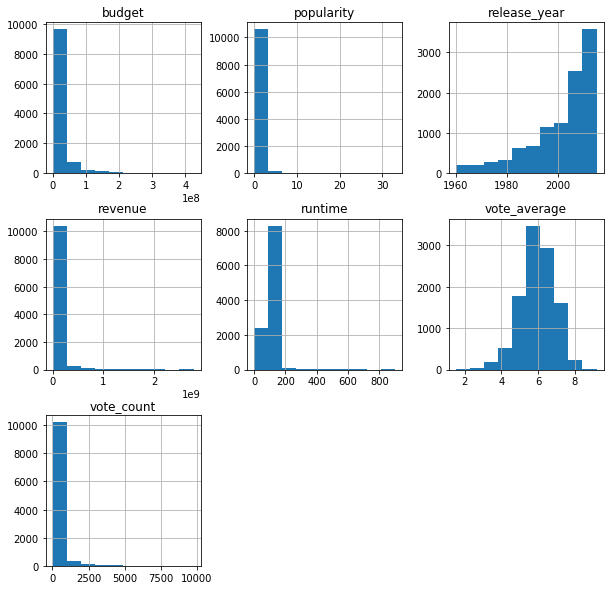

In [115]:
dfclean.hist(figsize=(10,10)); #plot histograms for all the variables of the dataset

#### Notes:   
(1)-Most of (vote_average) is between 5.5 and 7. <br/> 
(2)-Most (runtime) is around (100-200) minutes.<br/>
(3)-Most (popularity) didn't exceed 5.<br/>
(4)-Around 2500 movies have runtime less than 100 minutes.<br/>
(5)-Most vote_counts are less than (1000). <br/>
(6)-Most movies had a budget not exceeding 0.5x10^8. <br/>
(7)-Most movies released after year(2000). <br/>
(8)-Most revenues didn't exceed 0.3x10^9. <br/>

In [116]:
dfclean.dtypes #check variables datatype

popularity      float64
budget            int64
revenue           int64
director         object
runtime           int64
genres           object
vote_count        int64
vote_average    float64
release_year      int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:What are the top movies production companies (by number of released movies)?

In [117]:
df1['production_companies'].nunique() #The total number of production companies in the dataset

7445

In [118]:
df1['production_companies'].value_counts() #Total number of movies by production company Descending

Paramount Pictures                                                                                                                      156
Universal Pictures                                                                                                                      133
Warner Bros.                                                                                                                             84
Walt Disney Pictures                                                                                                                     76
Columbia Pictures                                                                                                                        72
Metro-Goldwyn-Mayer (MGM)                                                                                                                72
New Line Cinema                                                                                                                          61
Touchstone Pictures 

In [119]:
topproduction=df1['production_companies'].value_counts()
print(topproduction[0:20]) #Top 20 production companies -by total number of movies-

Paramount Pictures                        156
Universal Pictures                        133
Warner Bros.                               84
Walt Disney Pictures                       76
Columbia Pictures                          72
Metro-Goldwyn-Mayer (MGM)                  72
New Line Cinema                            61
Touchstone Pictures                        51
20th Century Fox                           50
Twentieth Century Fox Film Corporation     49
TriStar Pictures                           45
Orion Pictures                             42
Miramax Films                              32
DreamWorks Animation                       31
Columbia Pictures Corporation              31
Pixar Animation Studios                    30
Walt Disney Productions                    29
Dimension Films                            28
United Artists                             23
Marvel Studios                             22
Name: production_companies, dtype: int64


In [120]:
sum(topproduction[0:20]) #The total number of movies produced by the top 20 production companies

1117

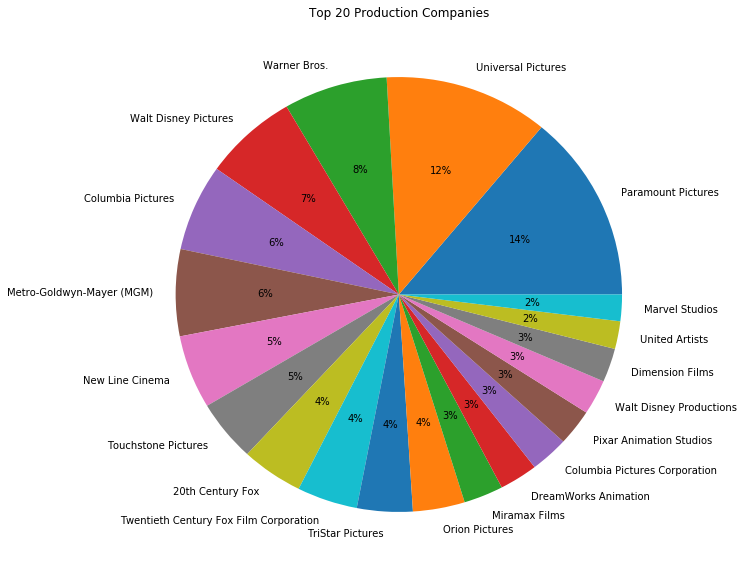

In [121]:
fig,ax=plt.subplots(figsize=(15,5))
topproduction[0:20].plot(kind='pie', figsize=(10,10),autopct="%1.0f%%")
plt.ylabel=("")
ax.set_title('Top 20 Production Companies')
ax.set_ylabel('')
plt.show();

#### Notes:   
The pie chart above shows The following: <br/>
(1)-(Paramount Pictures) is the leading production company in this dataset with the highest total number of movies (156) out of (10800) and the highest ratio  (14%  of 1117 movies).<br/>
(2)-The second top production company is (Universal Pictures) with ratio  (11.9% of 1117 movies).<br/>
        

### Research Question 2: Does the amount of movies production industry changed over years? How?

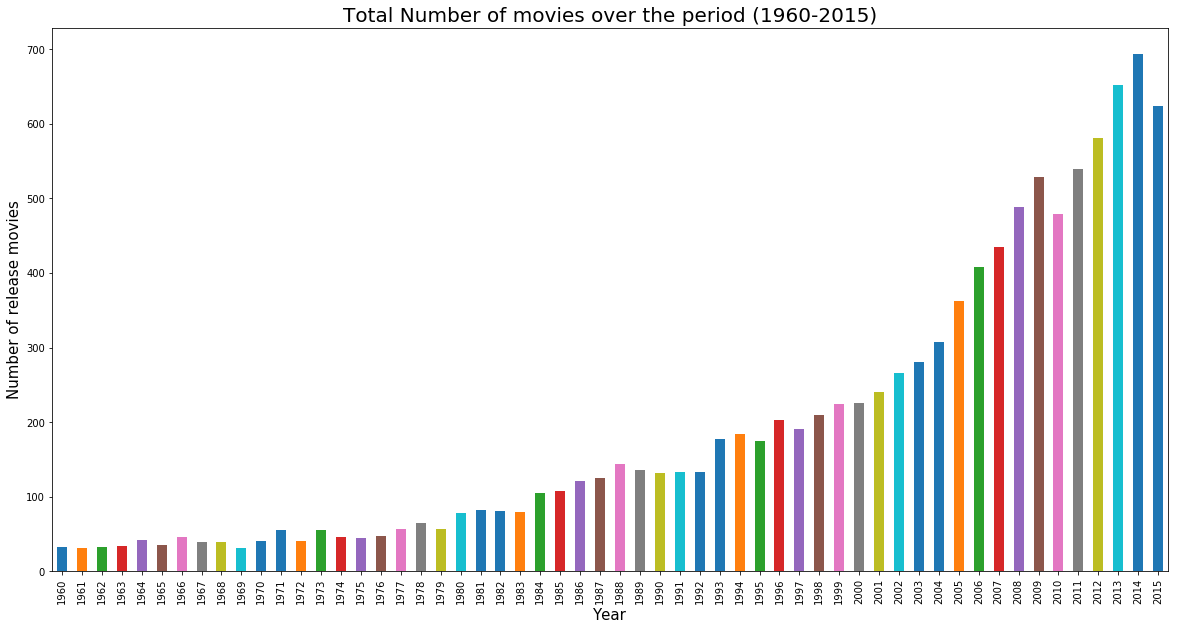

In [122]:
#Number of movies per year
total_movies_year=dfclean['release_year'].value_counts().sort_index()


fig,ax=plt.subplots(figsize=(15,5))
total_movies_year.plot(kind='bar', figsize=(20,10))
ax.set_title('Total Number of movies over the period (1960-2015)', fontsize=20)
ax.set_ylabel('Number of release movies', fontsize=15)
ax.set_xlabel('Year',fontsize=15)
plt.show();


#### Notes:   
(1)-The figure above shows that year (2014) released the highest total total number of movies. <br/>
(2)-The figure also shows that the number of released movies increased by time. Starting from 1960 to 1990, the figure shows a slight increase in movies production, but starting from 2000, the increase in production is exponential. <br/>

### Research Question 3: How does the average movie runtime changed over years? 

In [123]:
dfclean['runtime'].describe()


count    10800.000000
mean       102.189722
std         30.783873
min          0.000000
25%         90.000000
50%         99.000000
75%        111.250000
max        900.000000
Name: runtime, dtype: float64

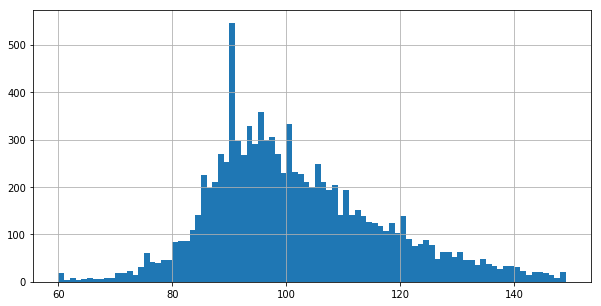

In [124]:
dfclean["runtime"].hist(bins=range(60, 150), figsize=(10,5));

In [33]:
dfclean['runtime'].median() #median runtime value

99.0

#### Notes: 
The histogram above shows the following:-<br/>
   (1)- Around (550) movies have a runtime of around (90 minutes), which is the median runtime value.<br/>
   (2)- Most of the movies have a runtime between (80 - 120) minutes.<br/>

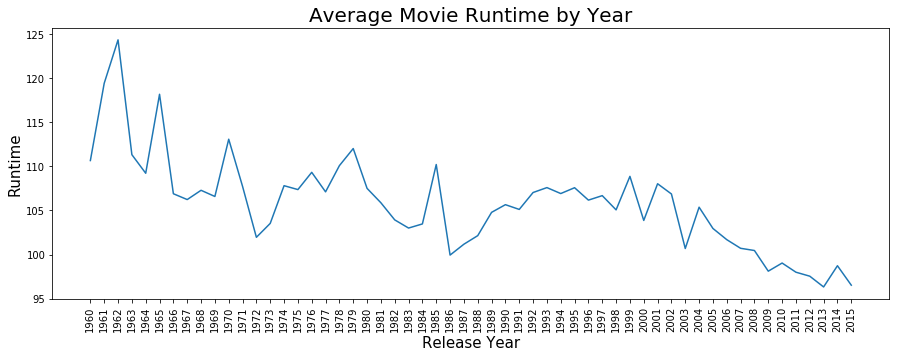

In [125]:
dfruntime=dfclean.groupby('release_year')['runtime'].mean()
fig,ax=plt.subplots(figsize=(15,5))
dfruntime.plot()
ax.set_title('Average Movie Runtime by Year', fontsize=20)
ax.set_xlabel('Release Year', fontsize=15)
ax.set_ylabel('Runtime', fontsize=15)
plt.xticks(np.arange(1960,2016, 1),rotation=90)
plt.show();

The plot above shows that movies tended to have  longer runtimes in the past. Year (1962) had the longest average runtime (close to 125 minutes). Years (2013) and (2015) recorded the shortest average runtime (between 95 and 100 minutes).

### Research Question 4: How does a movie runtime affect its popularity?

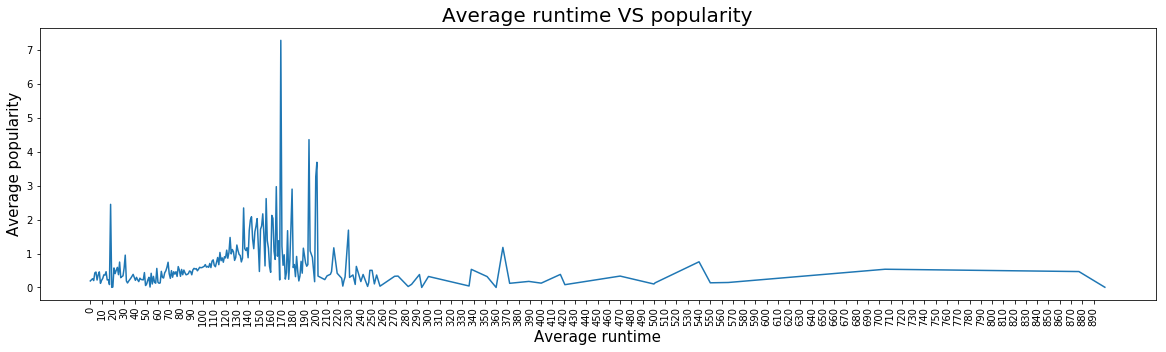

In [126]:
dfpopruntime=dfclean.groupby('runtime')['popularity'].mean()



fig,ax=plt.subplots(figsize=(20,5))
dfpopruntime.plot(figsize=(20,5))
ax.set_title('Average runtime VS popularity', fontsize=20)
ax.set_xlabel('Average runtime', fontsize=15)
ax.set_ylabel('Average popularity', fontsize=15)
plt.xticks(np.arange(0,900,10),rotation=90)
plt.show();

The plot shows that highest popularity movies have a runtime between 160 to 170 minutes. Movies with runtimes that is less than (100) minutes or exceeds (200) minutes tend to be less popular.

### Research Question 5: Which genres are dominating movies industry?

In [127]:
#define a function that will count the total number of movies for each genre
def count_genre(x):
    genres=dfclean['genres'] 
    genresplit=pd.Series(genres)
    count_data= genresplit.str.count(x).sum()
    return count_data


In [128]:
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']


b=[]
for i in genre:
    count_genre(i)
    b.append(count_genre(i))
    
dataset = pd.DataFrame({'genre': genre, 'total_number': list(b)}, columns=['genre', 'total_number'])
dataset


,genre,total_number
0,Adventure,1466
1,Science Fiction,1223
2,Fantasy,912
3,Crime,1353
4,Western,164
5,Family,1223
6,nan,0
7,Animation,692
8,War,270
9,Mystery,809


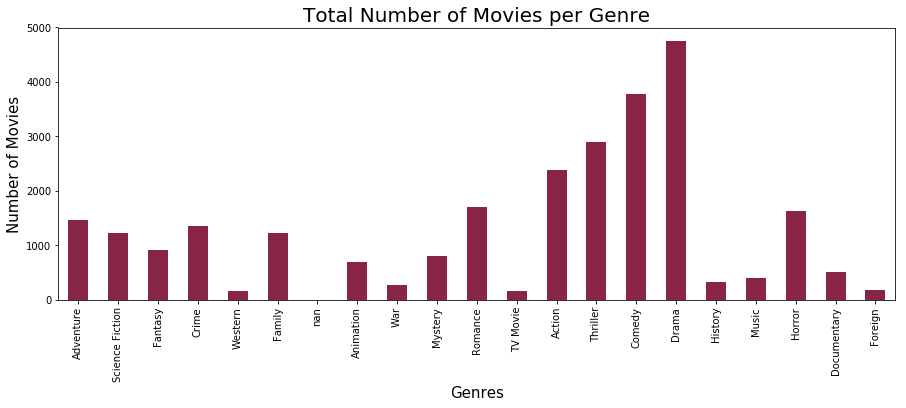

In [129]:

fig,ax=plt.subplots(figsize=(15,5))
ax.set_title('Total Number of Movies per Genre', fontsize=20)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
dataset.plot(ax=ax, kind='bar', color="#892449" , legend=False)
plt.xticks(range(len(dataset.genre)), dataset.genre); #add genres as xticks

Drama, comedy, thriller and action genres dominate movies industry production. Western, TV movies and foreign are the least produced genres . 

### Research Question 6: What is the effect of budget on each of the following: revenue, popularity, average voting and count of votes?

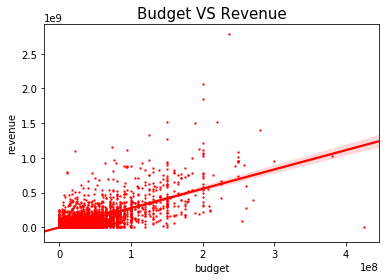

In [130]:
# Plot scatter plot with linear regression model for two columns: budget and revenue
sns.regplot(x=dfclean["budget"],y=dfclean["revenue"], marker='o', color='red', scatter_kws={'s':2}).set_title("Budget VS Revenue",size=15);

There is a strong positive correation between budget and revenue.

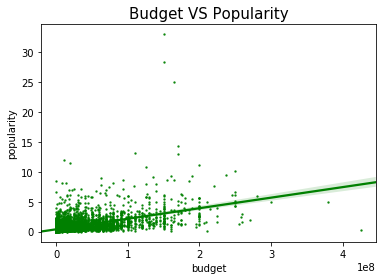

In [131]:
# Plot scatter plot with linear regression model for two columns: budget and popularity
sns.regplot(x=dfclean["budget"],y=dfclean["popularity"], marker='o', color='green', scatter_kws={'s':2}).set_title("Budget VS Popularity",size=15);

The plot shows that there is a positive correlation between budget and popularity. Outliers are clear in this plot.

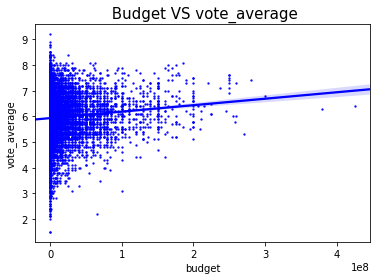

In [132]:
# Plot scatter plot with linear regression model for two columns: budget and vote_average
sns.regplot(x=dfclean["budget"],y=dfclean["vote_average"],marker='o', color='blue', scatter_kws={'s':2}).set_title(" Budget VS vote_average",size=15);

#### Notes:
(1)-The plot above shows that the budget doesn't have influence on average voting. This is not necessary to be accurate as many (budget) vlaues are (0) -as mentioned earleir- <br/>
(2)-Another point to note, is that most of vote_average is concentrated around (5 and 7), irrespective of the budget.<br/>

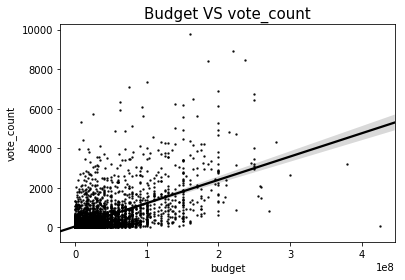

In [133]:
# Plot scatter plot with linear regression model for two columns: budget and vote_count
sns.regplot(x=dfclean["budget"],y=dfclean["vote_count"], marker='o', color='black', scatter_kws={'s':2}).set_title("Budget VS vote_count",size=15);

The plot has many outliers. The linear regression model shows a positive correlation between budget and vote_count. 

### Research Question 7: List top directors (by number of released movies).

In [134]:
dfclean['director'].describe() #have a look on (director) column

count           10800
unique           5056
top       Woody Allen
freq               45
Name: director, dtype: object

In [135]:
dfclean['director'].value_counts() #count the number of movies released by each director 

Woody Allen                       45
Clint Eastwood                    34
Steven Spielberg                  29
Martin Scorsese                   29
Ridley Scott                      23
Ron Howard                        22
Steven Soderbergh                 22
Joel Schumacher                   21
Brian De Palma                    20
Wes Craven                        19
Tim Burton                        19
Barry Levinson                    19
David Cronenberg                  18
Rob Reiner                        18
John Carpenter                    18
Mike Nichols                      18
Francis Ford Coppola              17
Tyler Perry                       17
Spike Lee                         17
Sidney Lumet                      17
Oliver Stone                      17
Robert Zemeckis                   17
Walter Hill                       17
Peter Hyams                       17
Stephen Frears                    17
Norman Jewison                    17
Renny Harlin                      17
R

In [136]:
all_director=dfclean['director'].value_counts()[0::] #some statistics about the previous array of (director) and total movies
all_director.describe()

count    5056.000000
mean        2.136076
std         2.526159
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        45.000000
Name: director, dtype: float64

In [137]:
top_director=dfclean['director'].value_counts()[0:20] #Top 20 directors (by total number of movies)


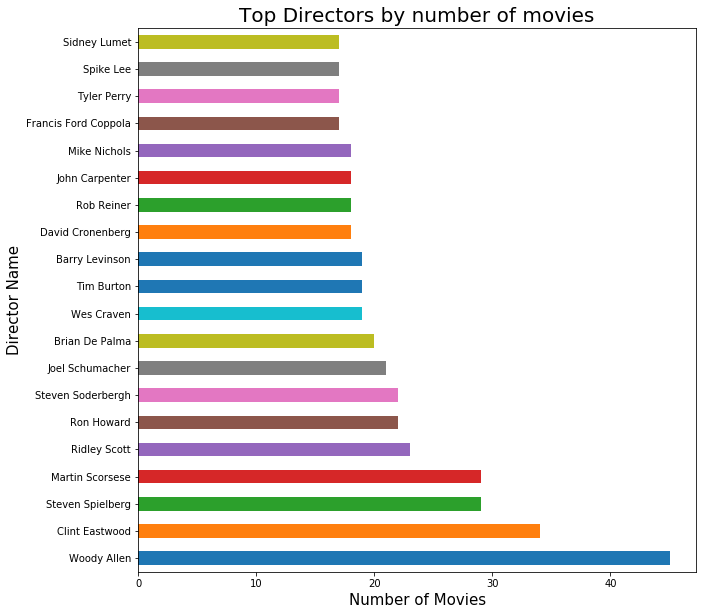

In [138]:
fig,ax=plt.subplots(figsize=(10,10))
top_director.plot(kind='barh')
ax.set_title('Top Directors by number of movies', fontsize=20)
ax.set_xlabel('Number of Movies',fontsize=15)
ax.set_ylabel('Director Name', fontsize=15)
plt.show();

#### Notes:
The plot and statistics above show that (Woody Allen) is the top 1 in directors with (45) movies, followed by (Clint Eastwood) with (34). Most directors have 1 to 2 movies only. The average is (2.1) per director. There are 5056 unique directors in this dataset.

### Research Question 8: What is the highest profit ? What is the lowest profit ? Does all movies scored real profit?

In [139]:
#find the profit 
# Add a new column (profit) at the position (4). Substract (budget from revenue) and put the difference in (profit)
dfclean.insert(1,"profit",dfclean["revenue"] - dfclean["budget"])
dfclean.head() #few few rows of the dataset after adding the (profit) column.

,popularity,profit,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,1363528810,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,228436354,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,185238201,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,1868178225,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,1316249360,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [140]:
dfclean['profit'].describe()

count    1.080000e+04
mean     2.535444e+07
std      9.686136e+07
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      9.525708e+06
max      2.544506e+09
Name: profit, dtype: float64

The min value of (profit) is negative, which indicate loss. It's clear now that not all movies scored real profit. 

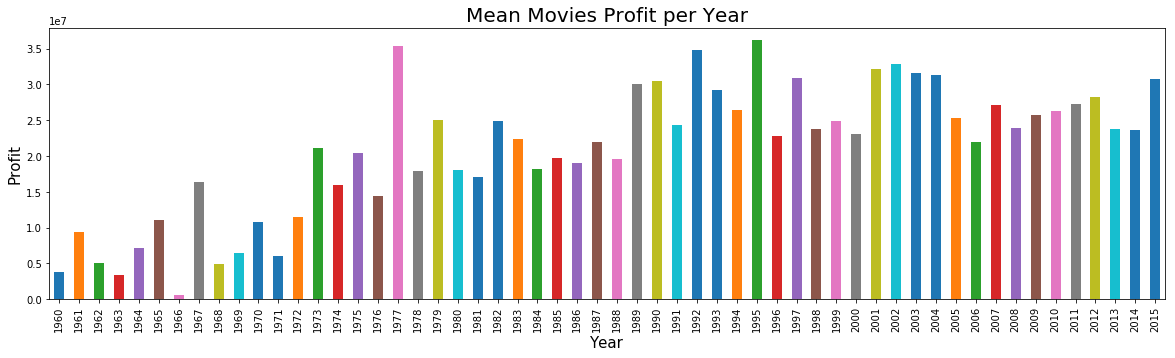

In [163]:
fig,ax=plt.subplots(figsize=(20,5))
dfclean.groupby(['release_year'])['profit'].mean().plot(kind='bar',ax=ax) # display the mean profit of movies per year
ax.set_title('Mean Movies Profit per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Profit',fontsize=15)
plt.show();

The plot above shows that year (1995) scored the highest average profit, while year(1966) scored the least average profit. 

In [142]:
dfclean['profit'].value_counts()

 0            4645
-10000000       69
-5000000        63
-20000000       45
-8000000        44
-3000000        42
-1000000        41
-2000000        38
-12000000       37
-6000000        36
-7000000        35
-15000000       35
-1500000        31
-3500000        27
-4000000        27
-30000000       26
-25000000       24
-500000         23
-35000000       23
-2500000        21
-11000000       20
-9000000        19
-22000000       15
-13000000       15
-17000000       14
-40000000       13
-16000000       13
-14000000       13
-18000000       13
-23000000       12
              ... 
 95509150        1
 19255967        1
-5984929         1
 34251425        1
 51004069        1
 9843379         1
-32385720        1
 31564473        1
 27663038        1
 41231041        1
-4473491         1
 23325328        1
 150000000       1
 98996879        1
-7115337         1
 6642254         1
 442965          1
 399026776       1
 1400000         1
 7027290         1
 60803676        1
 327363168  

In [143]:
loss=sum(dfclean['profit']<0) #Number of movies that scored loss
print(loss)

2383


In [144]:
prof=sum(dfclean['profit']>0) #number of movies that scored real profit
print(prof)

3772


In [145]:
neutral=sum(dfclean['profit']==0) #Number of movies where revenues have just covered the budget
print(neutral)

4645


#### Notes: 
(1)-The highest profit scored around (2.5xle9), while the greatest loss scored around (0.4xle9). <br/>
(2)-A number of (4645)  movies just covered their budget, (3772) movies scored real profit, while (2383) movies scored loss.<br/>

### Research Question 9: How does the voting of reviewers changed over time? 

In [146]:
avg_vote_year=dfclean.groupby('release_year')['vote_average'].mean() #calculate the average vote for each year, then group by year
avg_vote_year.describe()

count    56.000000
mean      6.105130
std       0.205561
min       5.788812
25%       5.960165
50%       6.037199
75%       6.244943
max       6.703636
Name: vote_average, dtype: float64


The least average votes  givn in this dataset is: 5.788, while the highest is 6.703. The average of ratings is 6.1. This means there is no significant change of votes over the years. 

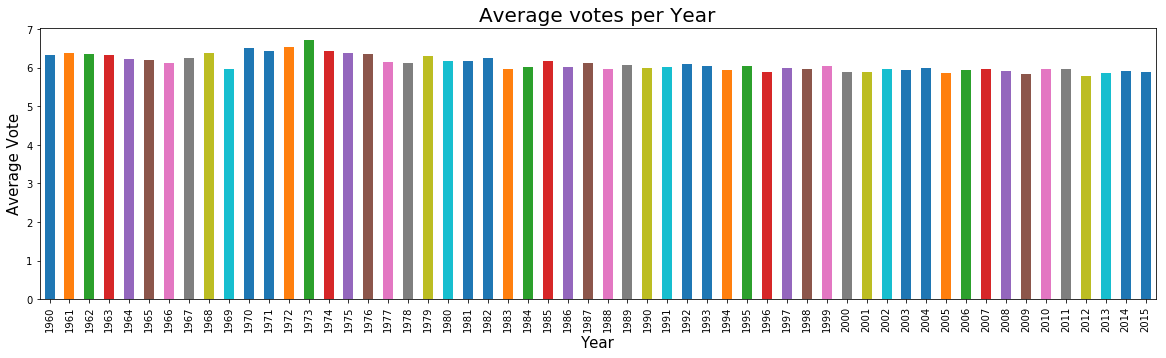

In [147]:
fig,ax=plt.subplots(figsize=(10,10))
avg_vote_year.plot(kind='bar', figsize=(20,5))
ax.set_title('Average votes per Year', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Average Vote', fontsize=15)
plt.show();

### Research Question 10: What are the characteristics of highest revenue movies? Who are the directors associated with highest revenues?

In [148]:
revenues=dfclean['revenue'].sort_values(ascending=False)
revenues


1386     2781505847
3        2068178225
5231     1845034188
4361     1519557910
0        1513528810
4        1506249360
14       1405035767
3374     1327817822
5422     1274219009
5425     1215439994
8        1156730962
3522     1123746996
4949     1118888979
4365     1108561013
8094     1106279658
4363     1081041287
6555     1065659812
1930     1063171911
1921     1025467110
3375     1021683000
4367     1017003568
2875     1001921825
2634      976475550
5434      970761885
7387      961000000
5431      958400000
634       955119788
1923      954305868
7388      938212738
1389      933959197
            ...    
5973              0
5970              0
5942              0
5969              0
5943              0
5944              0
5945              0
5946              0
5947              0
5948              0
5949              0
5950              0
5951              0
5952              0
5953              0
5954              0
5955              0
5956              0
5958              0


In [149]:
toprevenues=revenues[0:21] #Top 10 revenues 
toprevenues

1386    2781505847
3       2068178225
5231    1845034188
4361    1519557910
0       1513528810
4       1506249360
14      1405035767
3374    1327817822
5422    1274219009
5425    1215439994
8       1156730962
3522    1123746996
4949    1118888979
4365    1108561013
8094    1106279658
4363    1081041287
6555    1065659812
1930    1063171911
1921    1025467110
3375    1021683000
4367    1017003568
Name: revenue, dtype: int64

In [150]:
#properties of 20 movies with top revenues
dftoprev=pd.DataFrame(toprevenues) #convert list to dataframe
data_set = ['popularity','budget','director','runtime','genres','vote_average','release_year'] #movie properties to be listed with highest revenues
for i in data_set:
    dftoprev[i] = dfclean[i]
dftoprev.head(20)

,revenue,popularity,budget,director,runtime,genres,vote_average,release_year
1386,2781505847,9.432768,237000000,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009
3,2068178225,11.173104,200000000,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
5231,1845034188,4.355219,200000000,James Cameron,194,Drama|Romance|Thriller,7.3,1997
4361,1519557910,7.637767,220000000,Joss Whedon,143,Science Fiction|Action|Adventure,7.3,2012
0,1513528810,32.985763,150000000,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
4,1506249360,9.335014,190000000,James Wan,137,Action|Crime|Thriller,7.3,2015
14,1405035767,5.944927,280000000,Joss Whedon,141,Action|Adventure|Science Fiction,7.4,2015
3374,1327817822,5.711315,125000000,David Yates,130,Adventure|Family|Fantasy,7.7,2011
5422,1274219009,6.112766,150000000,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,7.5,2013
5425,1215439994,4.946136,200000000,Shane Black,130,Action|Adventure|Science Fiction,6.9,2013


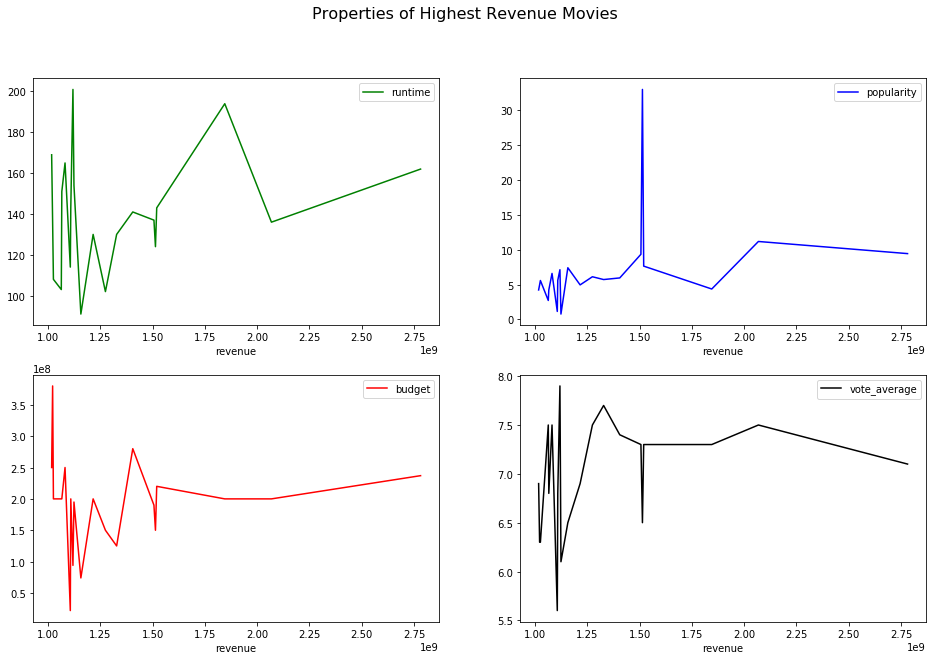

In [151]:
fig, ax = plt.subplots(2,2,figsize = (16,10))
fig.suptitle('Properties of Highest Revenue Movies',fontsize = 16)
dftoprev.plot(x='revenue', y='runtime', ax = ax[0][0], legend=True, color="green")
dftoprev.plot(x='revenue', y='popularity', ax = ax[0][1], legend=True, color="blue")
dftoprev.plot(x='revenue', y='budget', ax = ax[1][0], legend=True, color="red")
dftoprev.plot(x='revenue', y='vote_average', ax = ax[1][1], legend=True, color="black");

#### Notes:
(1)-Highest revenue movies tend to have a runtime around (160) minutes.<br/>
(2)-Highest revenue movies tend to have a popularity score around (10). <br/>
(3)-Highest revenue movies tend to have a budget of about 2.5x10^8.<br/>
(4)-Highest revenue movies tend to have an average vote of around (7.2).<br/>


In [152]:
dftoprev['director'].value_counts() #list of directors with number of highest revenues movies

James Cameron               2
Peter Jackson               2
Joss Whedon                 2
Colin Trevorrow             1
Sam Mendes                  1
Rob Marshall                1
Christopher Nolan           1
Gore Verbinski              1
J.J. Abrams                 1
Chris Buck|Jennifer Lee     1
Shane Black                 1
Michael Bay                 1
Lee Unkrich                 1
Tim Burton                  1
Irwin Winkler               1
Kyle Balda|Pierre Coffin    1
James Wan                   1
David Yates                 1
Name: director, dtype: int64

The directors: James Cameron, Joss Whedon and  Peter Jackson are each associated with two top reveneues movies. 

### Research Question 11: What is the trend of all movies genres over a specific year?

In [153]:
#each row has many genre values seperated by a pipe. Split 'genres' row to multiple rows according to associated number of genres.

#add new empty array
all_rows = []
for _, r in dfclean.iterrows(): #iterate on all rows 

    genre = str(r['genres']).split('|') #split each row into multiple lists
 

    rows = [[genre] + list(r[dfclean.columns[1:]]) for genre in itertools.product(genre)] #gather all the combinations of lists
    all_rows += rows

dfclean_split = pd.DataFrame(data=all_rows, columns=dfclean.columns) #convert the combined list into df. It's same as original df but with larger no. of rows.
dfclean_split.rename(columns = {'popularity': 'genre'}, inplace = True) #change the first column name to genre
dfclean_split.head() #check the df after splitting genre row




,genre,profit,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year
0,"(Action,)",1363528810,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,"(Adventure,)",1363528810,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
2,"(Science Fiction,)",1363528810,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
3,"(Thriller,)",1363528810,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
4,"(Action,)",228436354,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015


Note that each movie is repeated several times. The number of repetition depends on the number of splitted values in genre column of the original dataset. 

In [154]:
print(dfclean_split.groupby(['release_year'])['genre'].value_counts()) #group the new splitted df by year and count movies by genre


release_year  genre             
1960          (Drama,)               13
              (Action,)               8
              (Comedy,)               8
              (Horror,)               7
              (Romance,)              6
              (Thriller,)             6
              (Western,)              6
              (Adventure,)            5
              (History,)              5
              (Family,)               3
              (Science Fiction,)      3
              (Crime,)                2
              (Fantasy,)              2
              (War,)                  2
              (Foreign,)              1
              (Music,)                1
1961          (Drama,)               16
              (Comedy,)              10
              (Action,)               7
              (Romance,)              7
              (Adventure,)            6
              (Family,)               5
              (Science Fiction,)      4
              (History,)              3
       

In [155]:
dfgenre_split= pd.DataFrame(dfclean_split.groupby(['release_year'])['genre'].value_counts()) #change to df
dfgenre_split.head() #display the first few rows of df

genre
release_year genre            
1960         (Drama,)       13
             (Action,)       8
             (Comedy,)       8
             (Horror,)       7
             (Romance,)      6

In [156]:
dfgenre_split.query('release_year==2015').head() #check few rows of df for specific year (2015 for example)


genre
release_year genre             
2015         (Drama,)       260
             (Thriller,)    171
             (Comedy,)      160
             (Horror,)      125
             (Action,)      107

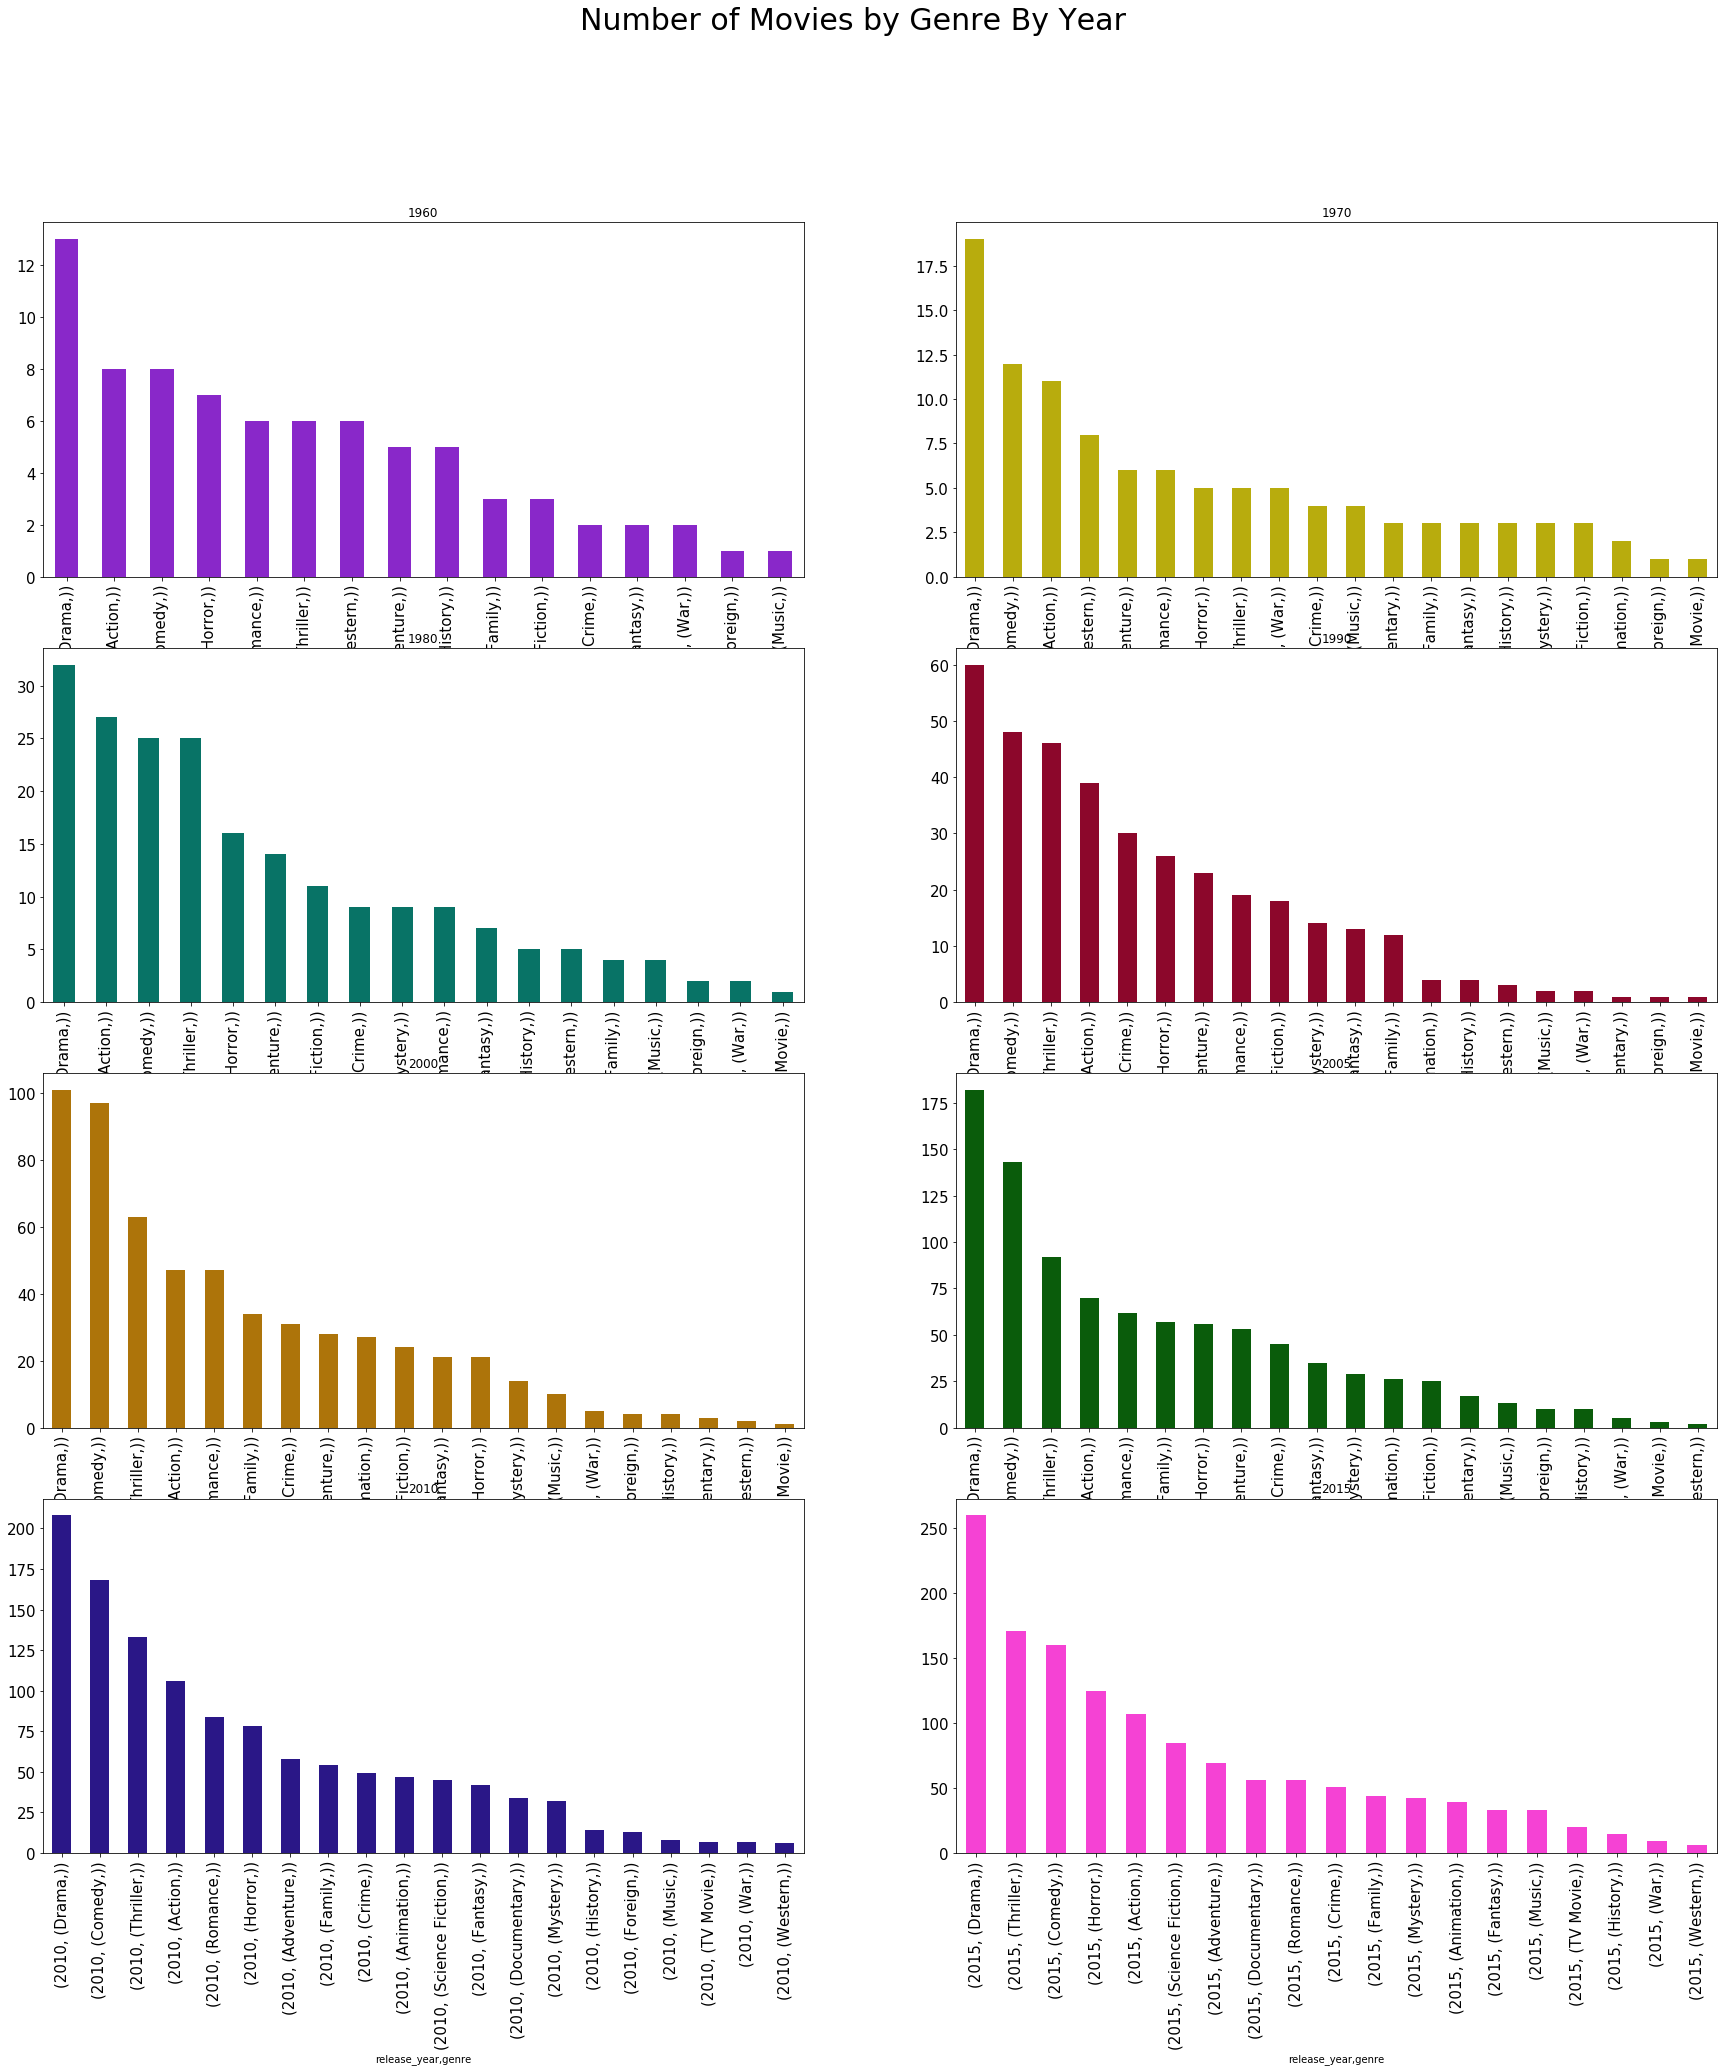

In [157]:
#display the info in the above dataframe by multiple plots in one fig. 
fig, ax = plt.subplots(4,2, figsize = (30,30))
fig.suptitle('Number of Movies by Genre By Year',fontsize = 30)
dfgenre_split.query('release_year==1960').plot(ax = ax[0][0], kind='bar', legend=False, color="#8928c9", title="1960", xticks = dfgenre_split['genre'],fontsize=15 )
dfgenre_split.query('release_year==1970').plot(ax = ax[0][1], kind='bar', legend=False, color="#b8ac0d", title="1970", xticks = dfgenre_split['genre'],fontsize=15)
dfgenre_split.query('release_year==1980').plot(ax = ax[1][0], kind='bar', legend=False, color="#087366", title="1980", xticks = dfgenre_split['genre'],fontsize=15)
dfgenre_split.query('release_year==1990').plot(ax = ax[1][1], kind='bar', legend=False, color="#8c072b", title="1990", xticks = dfgenre_split['genre'],fontsize=15)
dfgenre_split.query('release_year==2000').plot(ax = ax[2][0], kind='bar', legend=False, color="#ad740a", title="2000", xticks = dfgenre_split['genre'],fontsize=15)
dfgenre_split.query('release_year==2005').plot(ax = ax[2][1], kind='bar', legend=False, color="#0a5c0b", title="2005", xticks = dfgenre_split['genre'],fontsize=15)
dfgenre_split.query('release_year==2010').plot(ax = ax[3][0], kind='bar', legend=False, color="#2a1787", title="2010", xticks = dfgenre_split['genre'],fontsize=15)
dfgenre_split.query('release_year==2015').plot(ax = ax[3][1], kind='bar', legend=False, color="#f542d4",title="2015", xticks = dfgenre_split['genre'],fontsize=15);

#### Notes:
(1)-In year (1960): (drama) had the largest number of movies, followed by action and comedy with (8) movies for each. <br/>
(2)-In year (1970): (drama) movies increased to (19), followed by (comedy) with (12) movies, then (action) with (11) movies.<br/> 
(3)-In year (1980): (drama) movies increased to (32), followed by (action) with (27) movies, then (comedy) with (25) movies, and thriller came to compete with (25) movies as well. <br/>
(4)-In year (1990): (drama) movies increased to (60), followed by (comedy) with (48) movies, then (thriller) with (46) movies. (action) stayed back at (39) movies. <br/>
(5)-In year (2000): (drama) and (comedy) dominated with (101) and (97) movies respectively. (Thriller) and (action) where far at (63) and (47) respectively. <br/>
(6)-In year (2005): (drama) and (comedy) still dominating the industry with (182) and (143) movies respectively. <br/>
(7)-In year (2010): (drama) won the race as usual by (208) movies, follwoed by (comedy) with 168 only.
(8)-In year (2015): (drama) scored (260) movies follwoed by (thriller) which came to spotlight by (171) movies.

### Research Question 12: What is the trend of each genre over years?

In [158]:

#Use the splitted df of the previous step (dfclean_split) and Reverse: group by genre and count for each years.
genre_all_year=pd.DataFrame(dfclean_split.groupby(['genre'])['release_year'].value_counts())
genre_all_year.head() # display few rows
 

release_year
genre     release_year              
(Action,) 2014                   129
          2013                   119
          2011                   115
          2009                   108
          2015                   107

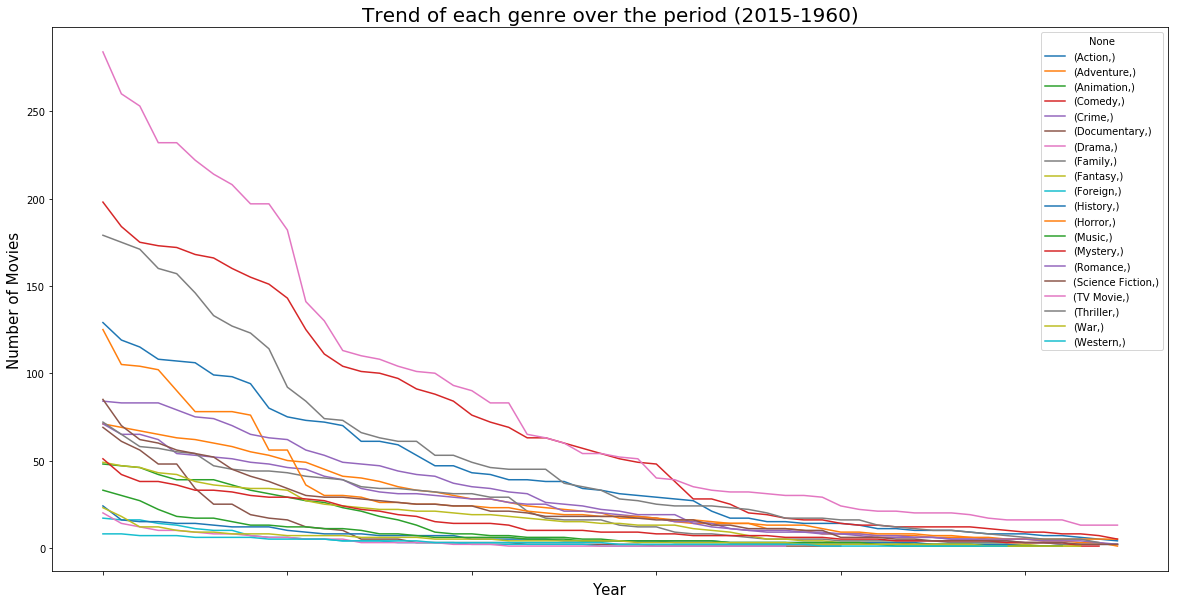

In [159]:
fig,ax=plt.subplots(figsize=(10,10))
genre_all_year.groupby(['genre'])['release_year'].plot( figsize=(20,10), legend=True)
ax.set_title('Trend of each genre over the period (2015-1960)', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15)
plt.show();

### Research Question 13: When did each genre scored its best number of movies?

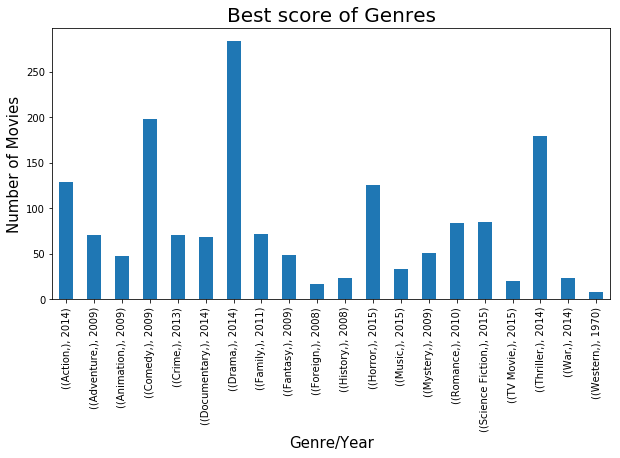

In [161]:
#Reverse: group by genre and count for all years.
genre_all_year=pd.DataFrame(dfclean_split.groupby(['genre'])['release_year'].value_counts())
fig,ax=plt.subplots(figsize=(10,10))
genre_all_year.groupby(['genre']).head(1).plot(ax=ax, kind='bar', figsize=(10,5), legend=False)
ax.set_title('Best score of Genres', fontsize=20)
ax.set_xlabel('Genre/Year', fontsize=15)
ax.set_ylabel('Number of Movies', fontsize=15);

<a id='conclusions'></a>
## conclusions
This project analyzed (tmdb) movies dataset to answer questions posed in the first section of this report. A summarized findings are listed below:
(1)-Top production companies include: Paramount Pictures, Universal Pictures, Warner Bros., Walt Disney Pictures, Metro-Goldwyn-Mayer (MGM), Columbia Pictures and New Line Cinema.<br/>
(2)-Movies industry showed great advancement in terms of number of released movies, specially in the period from 2005 to 2015.<br/>
(3)-Most movies in this dataset have runtimes range between 80 and 120 minutes. <br/>
(4)-Most popular movies have runtimes range between 150 and 200 minutes. <br/>
(5)-Drama, Comedy, Thriller and Action genres have the highest numbers of movies. Also they are the most popular for many years <br/>
(6)Movies with highest revenues share similar properties.

### Limitations: 
(1)Many values of (budget) and (revenues) are zero, which is wrong. I didn't drop their rows as this will definitely affect the quality of analysis process. It could be a good idea to use ML model to predict these values instead of just dropping them, or accepting (0) values. 
(2)The row (genre) has many values seperated by a pipe. There are many ways to split these values. the simplest way for me was to change the column to list and use (Series) to iterate on each row and count the number of times a particular pattern is repeated, then return back the different combinations of data into dataframe. It took a little bit long time due to working with lists, but the job is done. The below links (References) are very useful in this part.
(3)I didn't know how a plot takes its xticks from a column of a dataframe, the third reference was useful to solve this isse. 


### References
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.count.html <br/>
https://stackoverflow.com/questions/41927973/pandas-dataframe-pipe-separated-values-in-a-cell <br/>
https://stackoverflow.com/questions/50805666/showing-index-as-xticks-for-pandas-plot <br/>


In [164]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0